In [170]:
%matplotlib notebook
%matplotlib inline

In [171]:
# Load packages
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import functools as ft
import seaborn as sns
import re  
from scipy.stats import logistic
import calendar
import random
import json

In [172]:
# Load data 
youtube_data = pd.read_csv('YouTube_Data/US_youtube_trending_data.csv')
lookup = pd.read_csv('YouTube_Data/category_ids.csv')

In [173]:
lookup

,categoryId,category
0,2,Autos & Vehicles
1,1,Film & Animation
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [174]:
youtube_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [175]:
youtube_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16798 entries, 0 to 16797
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           16798 non-null  object
 1   title              16798 non-null  object
 2   publishedAt        16798 non-null  object
 3   channelId          16798 non-null  object
 4   channelTitle       16798 non-null  object
 5   categoryId         16798 non-null  int64 
 6   trending_date      16798 non-null  object
 7   tags               16798 non-null  object
 8   view_count         16798 non-null  int64 
 9   likes              16798 non-null  int64 
 10  dislikes           16798 non-null  int64 
 11  comment_count      16798 non-null  int64 
 12  thumbnail_link     16798 non-null  object
 13  comments_disabled  16798 non-null  bool  
 14  ratings_disabled   16798 non-null  bool  
 15  description        16707 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [176]:
# Function to parse dates (there is probably a built-in function, but this is what I was able to figure out)

def youtube_date_parse(df, series_to_parse, new_name_date, new_name_time, delimiting_character, drop_character):
    try:
        split = df[series_to_parse].str.split(delimiting_character, n = 1, expand = True)
        split[1] =split[1].map(lambda x: x.rstrip(drop_character))
        df[new_name_date] = split[0]
        df[new_name_time] = split[1]
        df.drop(columns = [series_to_parse], inplace=True)
        df[new_name_date] = pd.to_datetime(df[new_name_date])
        return df
    except:
        print('Already parsed, dumbass...')

In [177]:
########### Clean up data: drop columns, parse dates, replace category numbers with cateogry names, etc. #####

# Drop unneeded columns
#youtube_data.drop(['video_id','channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'],\
#                  axis=1, inplace = True)

youtube_data.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled'],\
                  axis=1, inplace = True)



In [178]:
########### Clean up data: drop columns, parse dates, replace category numbers with cateogry names, etc. #####

# Drop unneeded columns
#youtube_data.drop(['video_id','channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'],\
#                  axis=1, inplace = True)

# Convert date strings to datetime objects
youtube_date_parse(youtube_data, 'publishedAt', 'date_published', 'time_published', 'T', 'Z')
youtube_date_parse(youtube_data, 'trending_date', 'date_trending', 'time_trending', 'T', 'Z')
youtube_data.drop(['time_trending'], axis=1, inplace=True)

# The datetime functions are great, and can be used to group (see below).
# To make life easier for folks, I'm going to put month names in their own column
# notice the .dt.month syntax that works on datetime objects
youtube_data['month_published']= youtube_data['date_published'].dt.month
youtube_data['month_trending'] = youtube_data['date_trending'].dt.month
youtube_data['month_published'].replace([8,9,10,11], ['Aug', 'Sept', 'Oct', 'Nov'], inplace=True)
youtube_data['month_trending'].replace([8,9,10,11], ['Aug', 'Sept', 'Oct', 'Nov'], inplace=True)

# Calculate lag time between posting and trending.  You can do arithmetic with dates in datetime
youtube_data['lag'] = youtube_data['date_trending'] - youtube_data['date_published']

youtube_data['categoryNum'] = youtube_data.loc[:, 'categoryId']

# Covert category IDs to catetory names
youtube_data['categoryId'].replace(lookup['categoryId'].tolist(), lookup['category'].tolist(), inplace=True)

# Rename columns
new_names = {'channelTitle':'channel', 'categoryId':'category', 'view_count':'views', 'comment_count':'comments'}
youtube_data.rename(columns = new_names, inplace=True)

# Sort by likes
youtube_data.sort_values('likes', ascending=False, inplace=True)


# Reorder columns for readability
#new_order = ['channel', 'title', 'category', 'views', 'likes','dislikes','comments', 'date_published', 'date_trending','lag','month_published', 'month_trending', 'time_published','tags', 'description']
#youtube_data=youtube_data[new_order]

# Get column names so they are handy
cols = youtube_data.columns

# Keep only the most popular posting of duplicate videos
# I could maybe try to roll the stats for duplicates together,
# but this is tricky, in that they will have different dates.
youtube_data = youtube_data.drop_duplicates(subset='title', keep='first')




In [179]:
youtube_data.head(100)

,video_id,title,channelId,channel,category,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,month_published,month_trending,lag,categoryNum
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020-08-21,03:58:10,2020-08-28,Aug,Aug,7 days,10
4980,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795670,879354,2735997,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,2020-08-28,04:00:11,2020-09-05,Aug,Sept,8 days,10
11764,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,140685439,9217876,127308,1507605,BLACKPINK – ‘Lovesick Girls’영원한 밤창문 없는 방에 우릴 가...,2020-10-02,04:00:13,2020-10-09,Oct,Oct,7 days,10
2762,oxoWhyS9buA,BTS (방탄소년단) 'Dynamite' Official Teaser,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,62496726,6178664,158845,992356,BTS (방탄소년단) 'Dynamite' Official TeaserBTS (방탄소...,2020-08-18,15:00:02,2020-08-25,Aug,Aug,7 days,10
3992,BV2FdDmGiW0,BTS (방탄소년단) 'Dynamite' Official MV (B-side),UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,45596902,5951286,97683,382374,BTS (방탄소년단) 'Dynamite' Official MV (B-side)Cre...,2020-08-24,15:00:01,2020-08-31,Aug,Aug,7 days,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,CslrQbWW_8k,BTS (방탄소년단) Special Announcement | Fortnite x BTS,UCLkAepWjdylmXSltofFvsYQ,BANGTANTV,Music,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,4073320,1004177,3819,41181,Connect with BTS: https://ibighit.com/bts http...,2020-09-21,11:00:07,2020-09-24,Sept,Sept,3 days,10
14807,IoZri9hq7z4,I Uber’d People And Gave Them A Lamborghini,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,Entertainment,[None],10436587,978625,6524,49798,Subscribe for a free car!New Merch - https://s...,2020-10-24,20:00:01,2020-10-25,Oct,Oct,1 days,24
10599,ziotSaBtqGk,Melanie Martinez - The Bakery [Official Music ...,UC2YnEq5Fc5_zEO6bo0oNzCQ,melanie martinez,Music,melanie martinez|melanie|martinez|atlantic rec...,12211468,964500,24716,106823,After School EP Out Now: https://melanie.lnk.t...,2020-09-25,04:00:26,2020-10-03,Sept,Oct,8 days,10
9159,jeI992mvlEY,EVERGLOW (에버글로우) - LA DI DA MV,UC_pwIXKXNm5KGhdEVzmY60A,Stone Music Entertainment,Music,K-CULTURE korean Music MV Music Video K-Pop Kp...,41213361,963715,20383,102468,"♬ Available on iTunes, Apple Music : https://a...",2020-09-21,09:00:04,2020-09-26,Sept,Sept,5 days,10


In [190]:
# select only music category data

youtube_data_music_df = youtube_data.loc[youtube_data['category']=='Music']


In [187]:
youtube_data_music_df['categoryNum'].describe()

count    800.0
mean      10.0
std        0.0
min       10.0
25%       10.0
50%       10.0
75%       10.0
max       10.0
Name: categoryNum, dtype: float64

In [195]:
youtube_data_music_df.head(10)


,video_id,title,channelId,channel,category,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,month_published,month_trending,lag,categoryNum
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020-08-21,03:58:10,2020-08-28,Aug,Aug,7 days,10
4980,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795670,879354,2735997,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,2020-08-28,04:00:11,2020-09-05,Aug,Sept,8 days,10
11764,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,140685439,9217876,127308,1507605,BLACKPINK – ‘Lovesick Girls’영원한 밤창문 없는 방에 우릴 가...,2020-10-02,04:00:13,2020-10-09,Oct,Oct,7 days,10
2762,oxoWhyS9buA,BTS (방탄소년단) 'Dynamite' Official Teaser,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,62496726,6178664,158845,992356,BTS (방탄소년단) 'Dynamite' Official TeaserBTS (방탄소...,2020-08-18,15:00:02,2020-08-25,Aug,Aug,7 days,10
3992,BV2FdDmGiW0,BTS (방탄소년단) 'Dynamite' Official MV (B-side),UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,45596902,5951286,97683,382374,BTS (방탄소년단) 'Dynamite' Official MV (B-side)Cre...,2020-08-24,15:00:01,2020-08-31,Aug,Aug,7 days,10
11786,qvu4nPMyl3U,BTS (방탄소년단) 'Savage Love' (Laxed – Siren Beat)...,UCLkAepWjdylmXSltofFvsYQ,BANGTANTV,Music,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,38303194,4381781,36966,358317,#SavageLoveRemix #BTS #방탄소년단Connect with BTS: ...,2020-10-02,04:00:02,2020-10-09,Oct,Oct,7 days,10
985,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,Music,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,98442414,3207729,467717,310630,Cardi B - WAP feat. Megan Thee StallionStream/...,2020-08-07,04:00:10,2020-08-16,Aug,Aug,9 days,10
15557,tcYodQoapMg,Ariana Grande - positions (official video),UC0VOyT2OCBKdQhF3BAbZ-1g,ArianaGrandeVevo,Music,ariana grande positions|positions ariana grand...,47606296,3140640,57939,232049,The official “positions” music video by Ariana...,2020-10-23,04:00:10,2020-10-29,Oct,Oct,6 days,10
16382,P3cffdsEXXw,Harry Styles - Golden (Official Video),UCbOCbp5gXL8jigIBZLqMPrw,HarryStylesVEVO,Music,You Are So Golden|Youre So Golden|UR SO GOLDEN...,32844931,3042591,28667,281855,Listen to Harry Styles’ new album ‘Fine Line’ ...,2020-10-26,16:00:09,2020-11-02,Oct,Nov,7 days,10
12788,YxksUfnuEbI,BLACKPINK - 'Lovesick Girls' DANCE PRACTICE VIDEO,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,35796790,3010286,41351,181458,#BLACKPINK #블랙핑크 #LovesickGirls #DANCE_PRACTIC...,2020-10-08,15:00:08,2020-10-14,Oct,Oct,6 days,10


In [196]:
youtube_data_music_df_sorted = youtube_data_music_df.sort_values('views', ascending=False)
youtube_data_music_df_sorted

,video_id,title,channelId,channel,category,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,month_published,month_trending,lag,categoryNum
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020-08-21,03:58:10,2020-08-28,Aug,Aug,7 days,10
4980,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795670,879354,2735997,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,2020-08-28,04:00:11,2020-09-05,Aug,Sept,8 days,10
11764,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,140685439,9217876,127308,1507605,BLACKPINK – ‘Lovesick Girls’영원한 밤창문 없는 방에 우릴 가...,2020-10-02,04:00:13,2020-10-09,Oct,Oct,7 days,10
985,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,Music,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,98442414,3207729,467717,310630,Cardi B - WAP feat. Megan Thee StallionStream/...,2020-08-07,04:00:10,2020-08-16,Aug,Aug,9 days,10
16161,CM4CkVFmTds,TWICE I CAN'T STOP ME M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,TWICE|트와이스|eyeswideopen mv|I cant stop me mv|i...,74991178,2874511,63407,929318,TWICE I CAN'T STOP ME M/VTWICE 2nd Album Eyes ...,2020-10-26,08:59:54,2020-11-01,Oct,Nov,6 days,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,ifJ_6aAzApM,Callin (feat. Snoop Dogg),UCR28YDxjDE3ogQROaNdnRbQ,YoungBoy Never Broke Again - Topic,Music,YoungBoy Never Broke Again|Snoop Dogg|Callin (...,154853,11828,193,1031,"Provided to YouTube by Never Broke Again, LLCC...",2020-09-01,17:02:32,2020-09-06,Sept,Sept,5 days,10
1789,bHmH2rPZKS0,MurdaGang PB & Go Yayo - RICCO,UC72YAwwjHYBa4h--Z5ITGOA,Go Yayo,Music,MurdaGang PB ft. Go Yayo - RICCO|4e|ytn|murdag...,146261,5234,131,401,New visual Ricco by MurdaGang PB ft Go Yayo sh...,2020-08-14,21:44:46,2020-08-20,Aug,Aug,6 days,10
3226,KoQWzYC3zbk,King Von - How It Go (Audio),UC47kJWRBD-NREBvmBg5kWeA,King Von,Music,king von|king von 2018|king von official|king ...,129827,21229,122,2677,Listen to the single How It Go. Out now!Stream...,2020-08-28,04:22:38,2020-08-28,Aug,Aug,0 days,10
4431,ChKDhl_KEoI,Merkules & The Game - ''Deathwish'' (Official ...,UC1DGEwjCYxjR96FtaI5GFbA,Young Merkules,Music,The Game|No Jumper|DJ Vlad|akademiks|nelk|cana...,87479,11348,105,861,Merch: https://shopkt8merch.com/collections/me...,2020-09-03,04:00:10,2020-09-03,Sept,Sept,0 days,10


In [199]:
youtube_data_music_df_sorted.groupby('month_published').sum()

/var/folders/08/sqgb2bt15_l6kh0_05byp_y00000gn/T/ipykernel_13148/905166338.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  youtube_data_music_df_sorted.groupby('month_published').sum()


,views,likes,dislikes,comments,categoryNum
month_published,,,,,
Aug,1456162424,91268580,3705629,14201655,2210
Nov,37209435,2964694,36410,258605,100
Oct,1372202300,87793331,1484547,8706417,2900
Sept,1212887868,71623051,1448463,10766834,2790


/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) mi

/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from cu

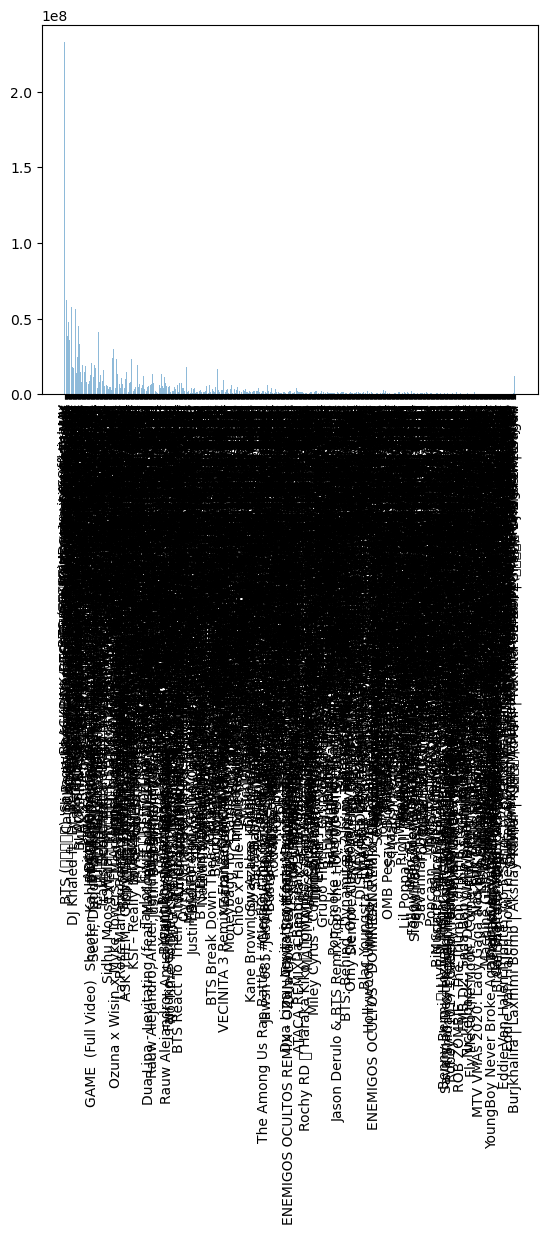

In [197]:
plt.bar(youtube_data_music_df['title'], youtube_data_music_df['views'], alpha=0.5, align='center')
plt.xticks(rotation=90)
plt.show()